Maximum Heat Capacity: 9.79e-23 J/K
Dissociation Temperature (Maximum C_V): 30.00 K


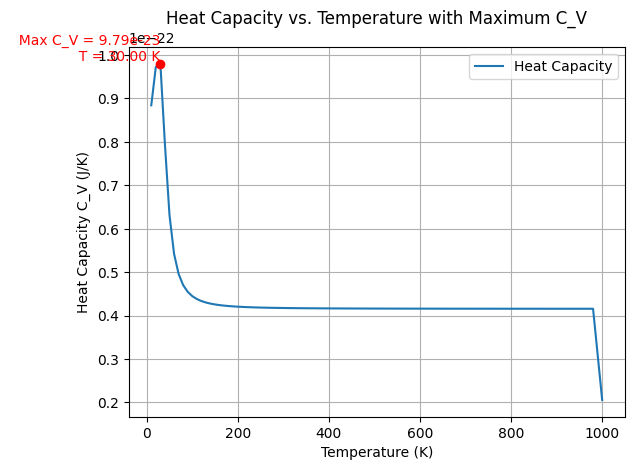

In [134]:
import numpy as np
from scipy.constants import k, h
from scipy.integrate import trapezoid
import matplotlib.pyplot as plt
from math import sqrt
import csv
import os

# Given Parameters
epsilon = 0.0103 * 1.60218e-19  # Lennard-Jones energy parameter in Joules (convert eV to Joule)
sigma = 3.4e-10  # Lennard-Jones length scale in meters (converted from Å)
V = 1000 * 1e-30  # Volume of the cubic box in cubic meters (converted from Å^3)
T_min = 10  # Minimum temperature in Kelvin
T_max = 1000  # Maximum temperature in Kelvin
N_points = 100  # Number of temperature points
m = 39.948 * 1.66053904e-27  # Mass of Argon in kg 
h = 6.62607015e-34  # Planck's constant in J·s

# Temperature range
T_values = np.linspace(T_min, T_max, N_points)

# Maximum relative distance in the cubic box (diagonal of the cubic box)
L_max = np.cbrt(V)

# Thermal wavelength λ
def thermal_wavelength(T):
    return sqrt(h ** 2 / (2 * np.pi * m * k * T)) 

# Lennard-Jones potential between two particles at relative distance r
def lj_potential(r):
    return 4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6)

# # Partition function for two LJ particles in a cubic box
# def partition_function(T):
#     λ = thermal_wavelength(T)  # Use thermal wavelength formula with Planck's constant
#     pre_factor = (V ** 2) / (λ ** 6)  # Pre-factor accounting for both particles

#     # Set the minimum and maximum relative distances based on the fixed volume
#     r_min = 0.001 * sigma  # Avoid zero to prevent singularity
#     r_max = np.cbrt(V)

#     # Discretize the range of relative distances between two particles
#     r_values = np.linspace(r_min, r_max, 1000)

#     # Compute the integrand for the partition function over the relative distance r
#     integrand = np.exp(-lj_potential(r_values) / (k * T)) * r_values**2

#     # Perform the trapezoidal integration over the relative distance r
#     Z_total = trapezoid(integrand, r_values)

#     return pre_factor * Z_total  # Return the partition function result

def partition_function(T):
    λ = thermal_wavelength(T)  # Use thermal wavelength formula with Planck's constant
    pre_factor = (4 * np.pi) ** 2 / (λ ** 6)  # Pre-factor accounting for spherical integration for both particles

    # Set the minimum and maximum relative distances based on the fixed volume
    r_min = 0.001 * sigma  # Avoid zero to prevent singularity
    r_max = np.cbrt(V)

    # Discretize the range of relative distances between two particles
    r_values = np.linspace(r_min, r_max, 1000)

    # Compute the integrand for the partition function over the relative distance r
    integrand = np.exp(-lj_potential(r_values) / (k * T)) * r_values**2

    # Perform the trapezoidal integration over the relative distance r for one particle
    Z_spherical = trapezoid(integrand, r_values)

    # Square the result to account for spherical integration over both particles
    Z_total = Z_spherical ** 2

    return pre_factor * Z_total  # Return the partition function result

# # Function to calculate internal energy
# def internal_energy(T):
#     beta = 1 / (k * T)
#     Z = partition_function(T)  # Assumed that this function doesn't save to a CSV
#     delta_T = T * 0.01  # Small finite difference step for numerical differentiation
#     Z_plus = partition_function(T + delta_T)
#     Z_minus = partition_function(T - delta_T)
#     delta_beta = (1 / (k * (T + delta_T))) - (1 / (k * (T - delta_T)))
#     dlnZ_dBeta = (np.log(Z_plus) - np.log(Z_minus)) / delta_beta
#     U = -(dlnZ_dBeta)
#     return U

# # Heat capacity C_V from internal energy U
# def heat_capacity(T_values):
#     U_values = np.array([internal_energy(T) for T in T_values])
#     C_V_values = np.gradient(U_values, T_values)  # Derivative of U with respect to T
#     return C_V_values, U_values

# # Write data to CSV file
# def write_csv(T_values, U_values, C_V_values):
#     current_directory = os.getcwd()
#     folder_name = "comp-prob-solv/homework-4-grad"
#     directory = os.path.join(current_directory, folder_name)
#     os.makedirs(directory, exist_ok=True)
#     csv_file_path = os.path.join(directory, "internal_energy_heat_capacity_vs_temperature.csv")

#     # Write the results to a CSV file
#     with open(csv_file_path, mode='w', newline='') as file:
#         writer = csv.writer(file)
#         writer.writerow(['Temperature (K)', 'Internal Energy (J)', 'Heat Capacity (J/K)'])
#         for T, U, C_V in zip(T_values, U_values, C_V_values):
#             writer.writerow([T, U, C_V])

#     print(f"CSV file successfully created at {csv_file_path}")

# # Find dissociation temperature
# def find_dissociation_temperature(C_V_values):
#     max_index = np.argmax(C_V_values)
#     dissociation_temp = T_values[max_index]
#     max_CV = C_V_values[max_index] 
#     print(f"Maximum Heat Capacity: {max_CV:.2e} J/K")
#     print(f"Dissociation Temperature (Maximum C_V): {dissociation_temp:.2f} K")
#     return dissociation_temp, max_CV

# # Plot heat capacity with dissociation temperature
# def plot_heat_capacity_with_dissociation(C_V_values, dissociation_temp, max_CV):
#     plt.plot(T_values, C_V_values, label='Heat Capacity')
#     plt.scatter([dissociation_temp], [max_CV], color='red', zorder=5)
#     plt.text(dissociation_temp, max_CV, f'  Max C_V = {max_CV:.2e}\n  T = {dissociation_temp:.2f} K', 
#              verticalalignment='bottom', horizontalalignment='right', color='red')
#     plt.title('Heat Capacity vs. Temperature with Maximum C_V')
#     plt.xlabel('Temperature (K)')
#     plt.ylabel('Heat Capacity C_V (J/K)')
#     plt.grid(True)
#     plt.legend()
#     plt.show()

# # Main execution
# C_V_values, U_values = heat_capacity(T_values)  # Calculate C_V and internal energy
# dissociation_temp, max_CV = find_dissociation_temperature(C_V_values)  # Find and print dissociation temperature
# plot_heat_capacity_with_dissociation(C_V_values, dissociation_temp, max_CV)  # Plot heat capacity with annotation

# Internal energy calculation using np.gradient
def internal_energy(T_values):
    Z_values = np.array([partition_function(T) for T in T_values])
    lnZ_values = np.log(Z_values)
    beta_values = 1 / (k * T_values)
    dlnZ_dBeta = np.gradient(lnZ_values, beta_values)
    U_values = -dlnZ_dBeta  # Internal energy U = -d(lnZ)/d(beta)
    return U_values

# Heat capacity calculation using np.gradient
def heat_capacity(T_values):
    U_values = internal_energy(T_values)
    C_V_values = np.gradient(U_values, T_values)
    return C_V_values, U_values

# Plotting the heat capacity with dissociation temperature
def plot_heat_capacity_with_dissociation(C_V_values, dissociation_temp, max_CV):
    plt.plot(T_values, C_V_values, label='Heat Capacity')
    plt.scatter([dissociation_temp], [max_CV], color='red', zorder=5)
    plt.text(dissociation_temp, max_CV, f'  Max C_V = {max_CV:.2e}\n  T = {dissociation_temp:.2f} K', 
             verticalalignment='bottom', horizontalalignment='right', color='red')
    plt.title('Heat Capacity vs. Temperature with Maximum C_V')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Heat Capacity C_V (J/K)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Find dissociation temperature from C_V values
def find_dissociation_temperature(C_V_values):
    max_index = np.argmax(C_V_values)
    dissociation_temp = T_values[max_index]
    max_CV = C_V_values[max_index]
    print(f"Maximum Heat Capacity: {max_CV:.2e} J/K")
    print(f"Dissociation Temperature (Maximum C_V): {dissociation_temp:.2f} K")
    return dissociation_temp, max_CV

# Main execution
C_V_values, U_values = heat_capacity(T_values)
dissociation_temp, max_CV = find_dissociation_temperature(C_V_values)
plot_heat_capacity_with_dissociation(C_V_values, dissociation_temp, max_CV)


In [5]:
# # Compute partition function for all temperatures
# partition_values = [partition_function(T) for T in T_values]

# # Get the current working directory
# current_directory = os.getcwd()

# # Specify the folder where the file will be saved, relative to the current directory
# folder_name = "comp-prob-solv/homework-4-grad"
# directory = os.path.join(current_directory, folder_name)

# # Create the directory if it does not exist
# os.makedirs(directory, exist_ok=True)

# # Specify the CSV file path
# csv_file_path = os.path.join(directory, "partition_function_vs_temperature.csv")

# # Write the results to a CSV file
# with open(csv_file_path, mode='w', newline='') as file:
#     writer = csv.writer(file)
#     # Write header
#     writer.writerow(['Temperature (K)', 'Partition Function'])
    
#     # Write data rows
#     for T, Z in zip(T_values, partition_values):
#         writer.writerow([T, Z])

# print(f"CSV file successfully created at {csv_file_path}")

In [156]:
import numpy as np
from scipy.constants import k, h
from scipy.integrate import trapezoid
from math import sqrt

# Given Parameters
epsilon = 0.0103 * 1.60218e-19  # Lennard-Jones energy parameter in Joules (convert eV to Joule)
sigma = 3.4e-10  # Lennard-Jones length scale in meters (converted from Å)
V = 1000 * 1e-30  # Volume of the cubic box in cubic meters (converted from Å^3)
m = 39.948 * 1.66053904e-27  # Mass of Argon in kg 

# Define thermal wavelength λ for Argon
def thermal_wavelength(T):
    return sqrt(h**2 / (2 * np.pi * m * k * T))

# Lennard-Jones potential between two particles at relative distance r
def lj_potential(r):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

# Compute the distance between two particles
def distance(x1, y1, z1, x2, y2, z2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)

# Partition function integral using the trapezoidal rule
def partition_function_trapezoid(T, N=100, grid_range=7, separation=1.0):
    λ = thermal_wavelength(T)
    
    # Create grid points for x, y, z for both particles
    x = np.linspace(-grid_range, grid_range, N)
    y = np.linspace(-grid_range, grid_range, N)
    z = np.linspace(-grid_range, grid_range, N)
    
    # Create 3D grids for the first and second particle
    X1, Y1, Z1 = np.meshgrid(x, y, z, indexing='ij')
    X2, Y2, Z2 = np.meshgrid(x, y, z, indexing='ij')
    
    # Apply separation between the two particles along the x-axis
    X2 = X2 + separation
    
    # Compute the distance between the two particles
    r12 = distance(X1, Y1, Z1, X2, Y2, Z2)
    
    # Avoid division by zero (singularity) by replacing r12=0 with a very small value
    r12[r12 == 0] = 1e-10

    # Compute the potential and integrand for the partition function
    V_LJ = lj_potential(r12)
    integrand = np.exp(-V_LJ / (k * T))
    
    # Perform the trapezoidal integration in sequence over each axis
    integral_z1 = trapezoid(integrand, z, axis=2)
    integral_y1 = trapezoid(integral_z1, y, axis=1)
    Z_sum = trapezoid(integral_y1, x, axis=0)

    # Pre-factor with thermal wavelength
    normalization_factor = 1 / λ**6
    Z = normalization_factor * Z_sum

    return Z

# Example usage for a specific task 3 condition
T = 10  # Example temperature in Kelvin
N = 50  # Number of grid points
grid_range = 5  # Example grid range in meters
separation = 0.7  # Example separation in meters

# Compute the partition function
Z_trapezoid = partition_function_trapezoid(T, N=N, grid_range=grid_range, separation=separation)
print(f"Partition function Z(T={T}, grid_range={grid_range}, separation={separation}) is approximately: {Z_trapezoid:.6f}")


Partition function Z(T=10, grid_range=5, separation=0.7) is approximately: 2251571131134133260713102583230609951399994080747429601709391872.000000


Maximum Heat Capacity: 4.14e-23 J/K
Dissociation Temperature (Maximum C_V): 980.00 K


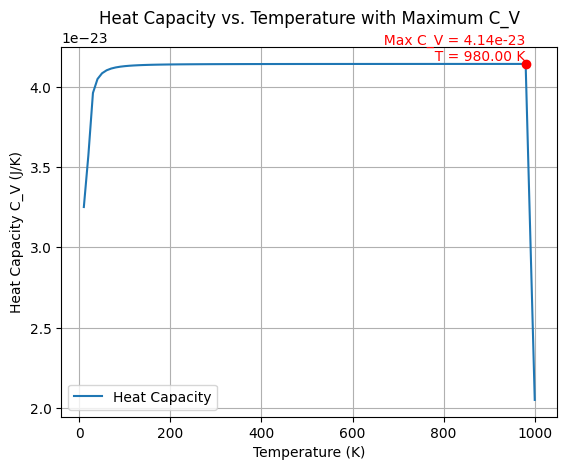

In [155]:

# Internal energy calculation using np.gradient
def internal_energy(T_values):
    Z_values = np.array([partition_function(T) for T in T_values])
    lnZ_values = np.log(Z_values)
    beta_values = 1 / (k * T_values)
    dlnZ_dBeta = np.gradient(lnZ_values, beta_values)
    U_values = -dlnZ_dBeta  # Internal energy U = -d(lnZ)/d(beta)
    return U_values

# Heat capacity calculation using np.gradient
def heat_capacity(T_values):
    U_values = internal_energy(T_values)
    C_V_values = np.gradient(U_values, T_values)
    return C_V_values, U_values

# Plotting the heat capacity with dissociation temperature
def plot_heat_capacity_with_dissociation(C_V_values, dissociation_temp, max_CV):
    plt.plot(T_values, C_V_values, label='Heat Capacity')
    plt.scatter([dissociation_temp], [max_CV], color='red', zorder=5)
    plt.text(dissociation_temp, max_CV, f'  Max C_V = {max_CV:.2e}\n  T = {dissociation_temp:.2f} K', 
             verticalalignment='bottom', horizontalalignment='right', color='red')
    plt.title('Heat Capacity vs. Temperature with Maximum C_V')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Heat Capacity C_V (J/K)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Find dissociation temperature from C_V values
def find_dissociation_temperature(C_V_values):
    max_index = np.argmax(C_V_values)
    dissociation_temp = T_values[max_index]
    max_CV = C_V_values[max_index]
    print(f"Maximum Heat Capacity: {max_CV:.2e} J/K")
    print(f"Dissociation Temperature (Maximum C_V): {dissociation_temp:.2f} K")
    return dissociation_temp, max_CV

# Main execution
C_V_values, U_values = heat_capacity(T_values)
dissociation_temp, max_CV = find_dissociation_temperature(C_V_values)
plot_heat_capacity_with_dissociation(C_V_values, dissociation_temp, max_CV)



C:\Users\khh38\AppData\Local\Temp\ipykernel_24176\2015340404.py:46: RuntimeWarning: divide by zero encountered in log
  ln_Z = np.log(Z_values)


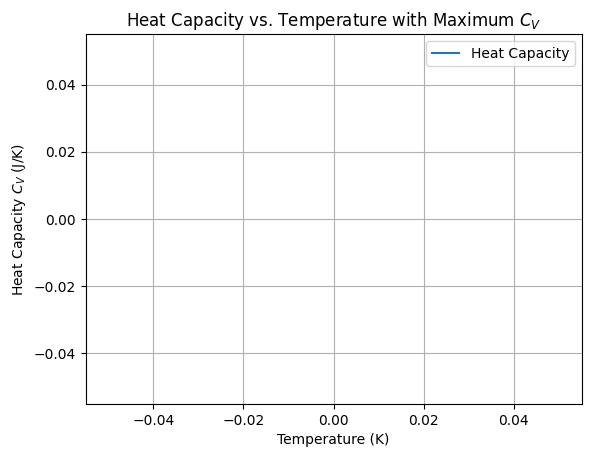

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import k  # Import the Boltzmann constant from scipy.constants
from scipy.integrate import trapezoid

# Constants
epsilon = 0.0103 * 1.60218e-19  # Lennard-Jones energy parameter in Joules (converted from eV to Joules)
sigma = 3.4e-10  # Lennard-Jones length scale in meters

# Lennard-Jones potential between two particles at relative distance r
def lj_potential(r):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

# Partition function using a vectorized trapezoidal rule in Cartesian coordinates
def partition_function_trapezoid(T, N=20, grid_range=5):
    beta = 1 / (k * T)  # Beta = 1 / (k_B T)
    
    # Create grid points for x, y, z for both particles
    x = np.linspace(-grid_range, grid_range, N)
    y = np.linspace(-grid_range, grid_range, N)
    z = np.linspace(-grid_range, grid_range, N)
    
    # Create 3D mesh grids for the positions of the first and second particle
    X1, Y1, Z1 = np.meshgrid(x, y, z, indexing='ij')
    X2, Y2, Z2 = np.meshgrid(x, y, z, indexing='ij')
    
    # Compute the relative distance r12 between two particles
    r12 = np.sqrt((X1 - X2)**2 + (Y1 - Y2)**2 + (Z1 - Z2)**2)
    
    # Avoid division by zero by setting a small value for r12 where it is zero
    r12[r12 == 0] = 1e-10
    
    # Compute the Lennard-Jones potential and the Boltzmann factor
    V_LJ = lj_potential(r12)
    boltzmann_factor = np.exp(-beta * V_LJ)
    
    # Perform the trapezoidal integration over all six dimensions
    integral_z2 = trapezoid(boltzmann_factor, z, axis=2)
    integral_y2 = trapezoid(integral_z2, y, axis=1)
    integral_x2 = trapezoid(integral_y2, x, axis=0)
    
    return integral_x2

# Compute the internal energy E(T)
def internal_energy(T_values, Z_values):
    ln_Z = np.log(Z_values)
    dlnZ_dT = np.gradient(ln_Z, T_values)  # Derivative of ln(Z) with respect to T
    E_T = -k * T_values**2 * dlnZ_dT  # Internal energy formula
    return E_T

# Compute the heat capacity C_V(T)
def heat_capacity(T_values, E_T):
    dE_dT = np.gradient(E_T, T_values)  # Derivative of E with respect to T
    return dE_dT

# Temperature range
T_values = np.linspace(10, 1000, 100)  # Temperature from 10K to 1000K

# Compute the partition function Z(T) for all temperatures using the vectorized trapezoidal rule
Z_values = [partition_function_trapezoid(T, N=20) for T in T_values]

# Calculate the internal energy E(T)
E_T = internal_energy(T_values, Z_values)

# Calculate the heat capacity C_V(T)
C_V = heat_capacity(T_values, E_T)

# Plot the heat capacity vs. temperature with the maximum value annotation
plt.plot(T_values, C_V, label='Heat Capacity')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity $C_V$ (J/K)')
plt.title('Heat Capacity vs. Temperature with Maximum $C_V$')
plt.grid(True)

# Find the maximum heat capacity and corresponding temperature
max_C_V = np.max(C_V)
max_T = T_values[np.argmax(C_V)]

# Annotate the maximum point
plt.annotate(f'Max $C_V$ = {max_C_V:.2e}\nT = {max_T:.2f} K', 
             xy=(max_T, max_C_V), 
             xytext=(max_T + 50, max_C_V - 0.05),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=12, color='red')

plt.legend()
plt.show()
